In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

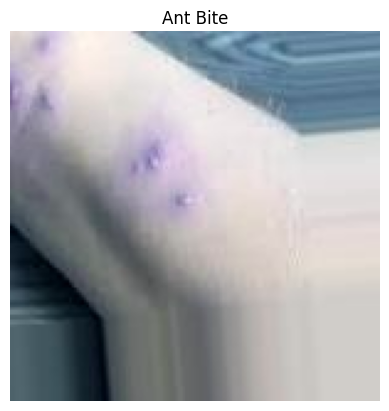

In [2]:
plt.title('Ant Bite'); plt.axis('off'); plt.imshow(cv2.imread('/kaggle/input/bugbite-v1/bugbite_dataset/training/ants/augmented_100_0.jpg'))

**Data Visualizations**

Grayscale intensity with histogram

In [3]:


def grayscale_frequency_histogram(image_path):

    image = cv2.imread(image_path)
    if image is None:
        print("Error: Could not open or read the image.")
        return
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

    plt.figure()
    plt.title("Grayscale Frequency Histogram")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.xlim(0, 255)
    plt.plot(histogram)
    plt.show()

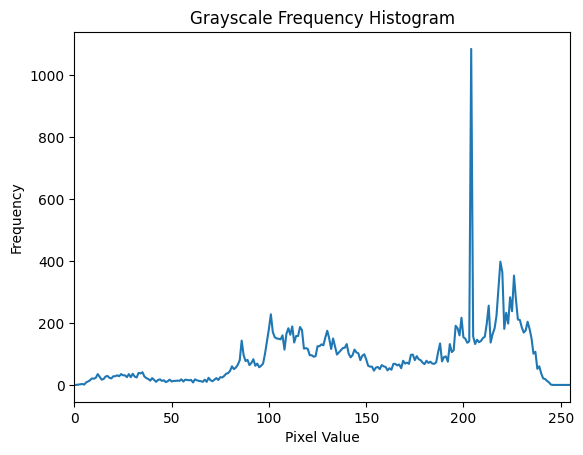

In [4]:
# ants
image_path = '/kaggle/input/bugbite-v1/bugbite_dataset/training/ants/augmented_100_0.jpg'
grayscale_frequency_histogram(image_path)

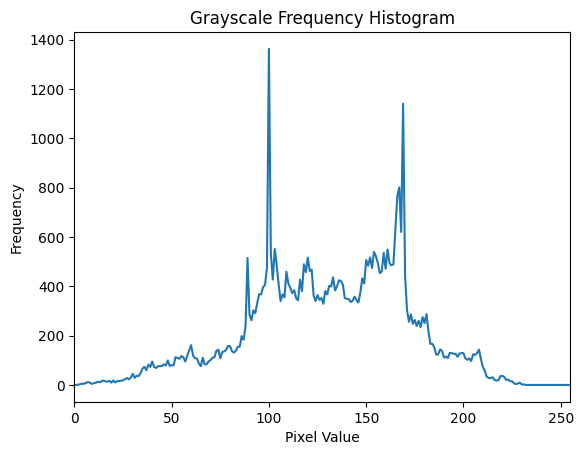

In [5]:
# bed bugs
image_path = '/kaggle/input/bugbite-v1/bugbite_dataset/training/bed_bugs/augmented_100_0.jpg'
grayscale_frequency_histogram(image_path)

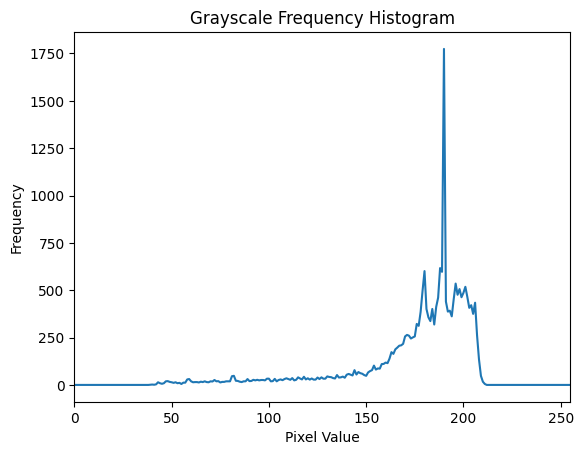

In [7]:
# chiggers
image_path = '/kaggle/input/bugbite-v1/bugbite_dataset/training/chiggers/augmented_100_0.jpg'
grayscale_frequency_histogram(image_path)

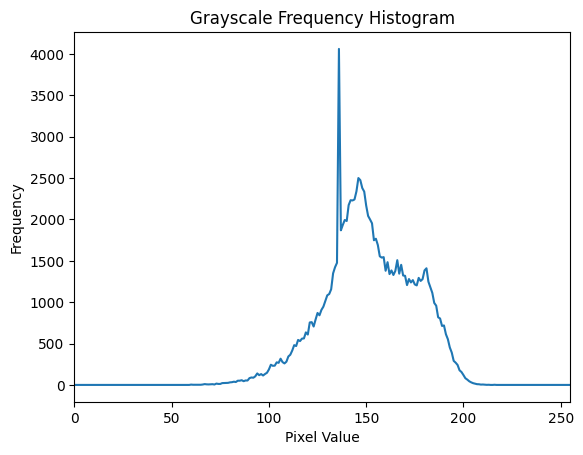

In [8]:
# fleas
image_path = '/kaggle/input/bugbite-v1/bugbite_dataset/training/fleas/augmented_100_0.jpg'
grayscale_frequency_histogram(image_path)

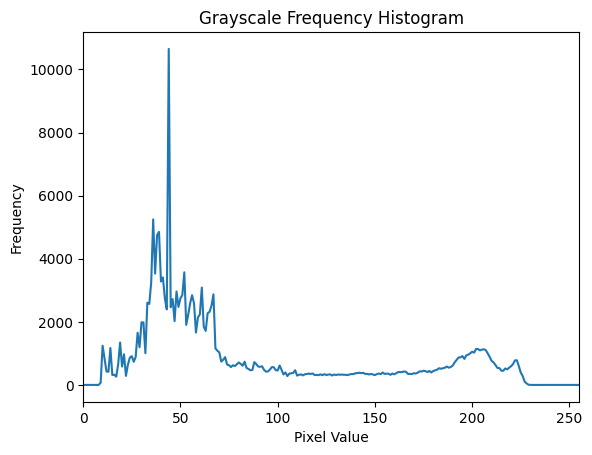

In [9]:
# mosquitos
image_path = '/kaggle/input/bugbite-v1/bugbite_dataset/training/mosquitos/augmented_100_0.jpg'
grayscale_frequency_histogram(image_path)

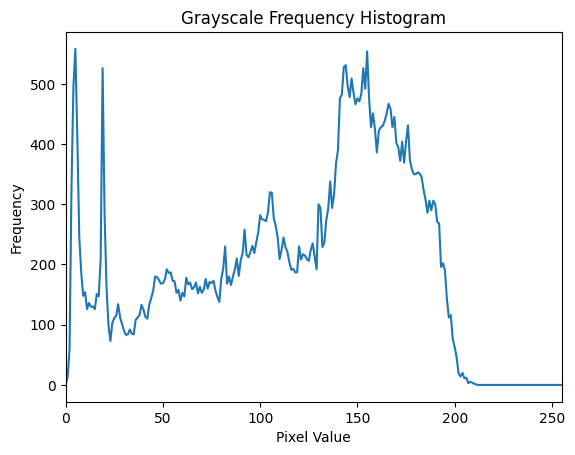

In [10]:
# no bites
image_path = '/kaggle/input/bugbite-v1/bugbite_dataset/training/no_bites/augmented_100_0.jpg'
grayscale_frequency_histogram(image_path)

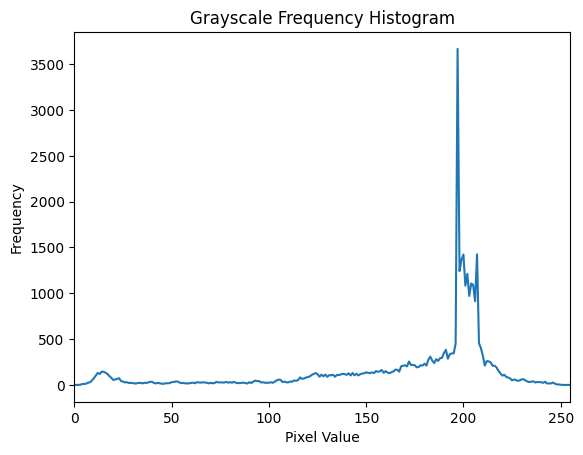

In [11]:
# spiders
image_path = '/kaggle/input/bugbite-v1/bugbite_dataset/training/spiders/augmented_100_0.jpg'
grayscale_frequency_histogram(image_path)

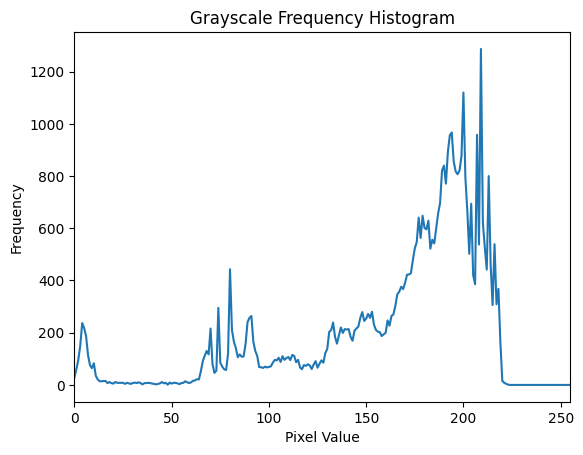

In [12]:
# ticks
image_path = '/kaggle/input/bugbite-v1/bugbite_dataset/training/ticks/augmented_100_0.jpg'
grayscale_frequency_histogram(image_path)

**Model training and deployment**

In [4]:
from tensorflow import keras
from keras import layers
from keras.applications import ResNet50,ResNet101,InceptionV3, Xception
from keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import plotly
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report
from matplotlib import pyplot as plt
import seaborn as sns
import cv2

In [5]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer,GlobalAveragePooling2D, Concatenate, Input
from keras.models import Sequential, Model

In [6]:
testGen = ImageDataGenerator()
trainGen = ImageDataGenerator(validation_split=0.15,vertical_flip=True,horizontal_flip=True,rotation_range=0.2)
trainGenerator = trainGen.flow_from_directory("/kaggle/input/bugbite-v1/bugbite_dataset/training",subset="training",target_size=(224,224))
validationGenerator = trainGen.flow_from_directory("/kaggle/input/bugbite-v1/bugbite_dataset/validation",target_size=(224,224),shuffle=False)
testGenerator = testGen.flow_from_directory( "/kaggle/input/bugbite-v1/bugbite_dataset/validation",target_size=(224,224),shuffle=False)

Found 4318 images belonging to 8 classes.
Found 440 images belonging to 8 classes.
Found 440 images belonging to 8 classes.


VGG19

In [18]:
from keras.applications.vgg19 import VGG19
vgg19_model = VGG19(weights="imagenet",include_top = False)
for layer in vgg19_model.layers:
    layer.trainable = False

I0000 00:00:1771822982.937104      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13757 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1771822982.943019      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13757 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [19]:
vgg19_model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

In [20]:
model1_vgg = Sequential()
model1_vgg.add(layers.Input(shape=(224,224,3)))
model1_vgg.add(layers.Lambda(keras.applications.vgg19.preprocess_input))
model1_vgg.add(vgg19_model)
model1_vgg.add(layers.GlobalAveragePooling2D())
model1_vgg.add(Dense(256, activation='relu'))
model1_vgg.add(Dropout(0.3))
model1_vgg.add(Dense(64, activation='relu'))
model1_vgg.add(Dropout(0.3))
model1_vgg.add(Dense(8, activation='softmax'))
model1_vgg.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])
model1_vgg.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                 │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,172,680 (76.95 MB)

 Trainable params: 148,296 (579.28 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [22]:
model1_vgg.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
history = model1_vgg.fit(trainGenerator,epochs=5,validation_data=validationGenerator)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


I0000 00:00:1771823039.971712     190 service.cc:152] XLA service 0x7c2ead297ae0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1771823039.971757     190 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1771823039.971763     190 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1771823040.647460     190 cuda_dnn.cc:529] Loaded cuDNN version 91002


  1/135 ━━━━━━━━━━━━━━━━━━━━ 36:33 16s/step - accuracy: 0.1875 - loss: 5.5996

I0000 00:00:1771823053.961497     190 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


135/135 ━━━━━━━━━━━━━━━━━━━━ 101s 629ms/step - accuracy: 0.1927 - loss: 2.6308 - val_accuracy: 0.4523 - val_loss: 1.6252
Epoch 2/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 51s 377ms/step - accuracy: 0.3475 - loss: 1.6974 - val_accuracy: 0.5250 - val_loss: 1.4216
Epoch 3/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 52s 381ms/step - accuracy: 0.4711 - loss: 1.4193 - val_accuracy: 0.5864 - val_loss: 1.2744
Epoch 4/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 52s 383ms/step - accuracy: 0.5336 - loss: 1.2511 - val_accuracy: 0.5977 - val_loss: 1.2689
Epoch 5/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 52s 384ms/step - accuracy: 0.5684 - loss: 1.1632 - val_accuracy: 0.6273 - val_loss: 1.1790


In [23]:
CLASS_NAMES = list(trainGenerator.class_indices.keys())
predictions = np.argmax(model1_vgg.predict(testGenerator), axis=1)
acc = accuracy_score(testGenerator.labels, predictions)
print(acc)

14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 249ms/step
0.6090909090909091


In [24]:
# Display classification report
print('Classification Report:')
print(classification_report(testGenerator.labels, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.75      0.74        56
           1       0.68      0.75      0.71        72
           2       0.70      0.56      0.62        68
           3       0.67      0.57      0.62        42
           4       0.15      0.30      0.20        20
           5       0.62      0.68      0.65        62
           6       0.53      0.57      0.55        56
           7       0.68      0.47      0.56        64

    accuracy                           0.61       440
   macro avg       0.59      0.58      0.58       440
weighted avg       0.64      0.61      0.62       440



**RESNET50**

In [25]:
resnet_model = ResNet50(include_top=False,weights="imagenet")
for layer in resnet_model.layers[:140]:
    layer.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [26]:
resnet_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, None,      │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, None,      │      9,472 │ conv1_pad[0][0]   │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, None,      │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, None,      │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, None,      │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, None,      │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, None,      │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, None,      │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, None,      │          0 │ conv2_block1_1_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, None,      │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, None,      │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, None,      │          0 │ conv2_block1_2_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, None,      │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, None,      │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, None,      │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, None,      │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 14,978,048 (57.14 MB)

 Non-trainable params: 8,609,664 (32.84 MB)

In [28]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential

In [29]:
model1_resnet50 = Sequential()
model1_resnet50.add(layers.Input(shape=(224,224,3)))
model1_resnet50.add(layers.Lambda(keras.applications.resnet50.preprocess_input))
model1_resnet50.add(resnet_model)
model1_resnet50.add(layers.GlobalAveragePooling2D())
model1_resnet50.add(Dense(256, activation='relu'))
model1_resnet50.add(Dropout(0.3))
model1_resnet50.add(Dense(64, activation='relu'))
model1_resnet50.add(Dropout(0.3))
model1_resnet50.add(Dense(8, activation='softmax'))
model1_resnet50.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])
model1_resnet50.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)               │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,129,224 (92.05 MB)

 Trainable params: 15,519,560 (59.20 MB)

 Non-trainable params: 8,609,664 (32.84 MB)

In [30]:
model1_resnet50.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
history = model1_resnet50.fit(trainGenerator,epochs=5,validation_data=validationGenerator)

Epoch 1/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 90s 501ms/step - accuracy: 0.4191 - loss: 1.6735 - val_accuracy: 0.5000 - val_loss: 2.4298
Epoch 2/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 50s 369ms/step - accuracy: 0.7163 - loss: 0.8691 - val_accuracy: 0.7023 - val_loss: 1.4371
Epoch 3/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 50s 368ms/step - accuracy: 0.8072 - loss: 0.6007 - val_accuracy: 0.7045 - val_loss: 1.2662
Epoch 4/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 50s 367ms/step - accuracy: 0.8678 - loss: 0.4303 - val_accuracy: 0.7500 - val_loss: 1.1311
Epoch 5/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 50s 367ms/step - accuracy: 0.8788 - loss: 0.3634 - val_accuracy: 0.7159 - val_loss: 1.1678


In [31]:
CLASS_NAMES = list(trainGenerator.class_indices.keys())
predictions = np.argmax(model1_resnet50.predict(testGenerator), axis=1)
acc = accuracy_score(testGenerator.labels, predictions)
print(acc)

14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 366ms/step
0.7272727272727273


In [32]:
# Display classification report
print('Classification Report:')
print(classification_report(testGenerator.labels, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        56
           1       0.82      0.64      0.72        72
           2       0.66      0.56      0.60        68
           3       0.60      0.71      0.65        42
           4       0.58      0.70      0.64        20
           5       0.89      0.77      0.83        62
           6       0.83      0.71      0.77        56
           7       0.75      0.75      0.75        64

    accuracy                           0.73       440
   macro avg       0.72      0.73      0.72       440
weighted avg       0.74      0.73      0.73       440



**RESNET50V2**

In [33]:
from keras.applications import ResNet50V2
resnetv2_model = ResNet50V2(include_top=False,weights="imagenet")
for layer in resnetv2_model.layers[:140]:
    layer.trainable = False

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [34]:
resnetv2_model.summary()

Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, None,      │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, None,      │      9,472 │ conv1_pad[0][0]   │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, None,      │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, None,      │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, None,      │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, None,      │          0 │ conv2_block1_pre… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, None,      │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, None,      │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, None,      │          0 │ conv2_block1_1_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, None,      │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, None,      │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, None,      │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, None,      │          0 │ conv2_block1_2_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, None,      │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, None,      │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, None,      │          0 │ conv2_block1_0_c

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 16,352,256 (62.38 MB)

 Non-trainable params: 7,212,544 (27.51 MB)

In [35]:
model1_resnet50v2 = Sequential()
model1_resnet50v2.add(layers.Input(shape=(224,224,3)))
model1_resnet50v2.add(layers.Lambda(keras.applications.resnet_v2.preprocess_input))
model1_resnet50v2.add(resnetv2_model)
model1_resnet50v2.add(layers.GlobalAveragePooling2D())
model1_resnet50v2.add(Dense(256, activation='relu'))
model1_resnet50v2.add(Dropout(0.3))
model1_resnet50v2.add(Dense(64, activation='relu'))
model1_resnet50v2.add(Dropout(0.3))
model1_resnet50v2.add(Dense(8, activation='softmax'))
model1_resnet50v2.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])
model1_resnet50v2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_2 (Lambda)               │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50v2 (Functional)         │ (None, 7, 7, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,106,312 (91.96 MB)

 Trainable params: 16,893,768 (64.44 MB)

 Non-trainable params: 7,212,544 (27.51 MB)

In [36]:
model1_resnet50v2.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
history = model1_resnet50v2.fit(trainGenerator,epochs=5,validation_data=validationGenerator)

Epoch 1/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 91s 504ms/step - accuracy: 0.3707 - loss: 1.7572 - val_accuracy: 0.3795 - val_loss: 4.3215
Epoch 2/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 50s 370ms/step - accuracy: 0.6205 - loss: 1.1142 - val_accuracy: 0.6273 - val_loss: 1.5126
Epoch 3/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 50s 367ms/step - accuracy: 0.7010 - loss: 0.8987 - val_accuracy: 0.7068 - val_loss: 0.9361
Epoch 4/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 50s 371ms/step - accuracy: 0.7689 - loss: 0.7291 - val_accuracy: 0.6432 - val_loss: 1.5292
Epoch 5/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 49s 364ms/step - accuracy: 0.7853 - loss: 0.6365 - val_accuracy: 0.7659 - val_loss: 0.8534


In [37]:
CLASS_NAMES = list(trainGenerator.class_indices.keys())
predictions = np.argmax(model1_resnet50v2.predict(testGenerator), axis=1)
acc = accuracy_score(testGenerator.labels, predictions)
print(acc)

14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 334ms/step
0.7363636363636363


In [39]:
# Display classification report
print('Classification Report:')
print(classification_report(testGenerator.labels, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.93      0.83        56
           1       0.81      0.69      0.75        72
           2       0.53      0.71      0.61        68
           3       0.67      0.76      0.71        42
           4       0.78      0.70      0.74        20
           5       0.88      0.74      0.81        62
           6       0.73      0.68      0.70        56
           7       0.92      0.69      0.79        64

    accuracy                           0.74       440
   macro avg       0.76      0.74      0.74       440
weighted avg       0.76      0.74      0.74       440



**MobileNet**

In [40]:
from keras.applications import MobileNet
MobileNet_model = MobileNet(include_top=False,weights="imagenet")
for layer in MobileNet_model.layers[:140]:
    layer.trainable = False

/tmp/ipykernel_55/372614682.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  MobileNet_model = MobileNet(include_top=False,weights="imagenet")


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [41]:
MobileNet_model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, None, None, 32) │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, None, None, 32) │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, None, None, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, None, None, 32) │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, None, None, 32) │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, None, None, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, None, None, 64) │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, None, None, 64) │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, None, None, 64) │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, None, None, 64) │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, None, None,     │         8,192 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, None, None,     │           512 │
│ (BatchNormalization)            │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, None, None,     │         1,152 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, None, None,     │           512 │
│ (BatchNormalization)            │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,228,864 (12.32 MB)

In [42]:
model1_mobilenet = Sequential()
model1_mobilenet.add(layers.Input(shape=(224,224,3)))
model1_mobilenet.add(layers.Lambda(keras.applications.mobilenet.preprocess_input))
model1_mobilenet.add(MobileNet_model)
model1_mobilenet.add(layers.GlobalAveragePooling2D())
model1_mobilenet.add(Dense(256, activation='relu'))
model1_mobilenet.add(Dropout(0.3))
model1_mobilenet.add(Dense(64, activation='relu'))
model1_mobilenet.add(Dropout(0.3))
model1_mobilenet.add(Dense(8, activation='softmax'))
model1_mobilenet.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])
model1_mobilenet.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_3 (Lambda)               │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenet_1.00_224 (Functional) │ (None, 7, 7, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,508,232 (13.38 MB)

 Trainable params: 279,368 (1.07 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [43]:
model1_mobilenet.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
history = model1_mobilenet.fit(trainGenerator,epochs=5,validation_data=validationGenerator)

Epoch 1/5


2026-02-23 05:21:51.973932: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-23 05:21:52.112495: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


  9/135 ━━━━━━━━━━━━━━━━━━━━ 35s 279ms/step - accuracy: 0.1508 - loss: 2.3698

2026-02-23 05:22:03.262301: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-23 05:22:03.400795: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 0.2524 - loss: 1.9851

2026-02-23 05:22:58.965208: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-23 05:22:59.103402: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


135/135 ━━━━━━━━━━━━━━━━━━━━ 79s 495ms/step - accuracy: 0.2531 - loss: 1.9835 - val_accuracy: 0.6023 - val_loss: 1.2436
Epoch 2/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 48s 355ms/step - accuracy: 0.4958 - loss: 1.3862 - val_accuracy: 0.6682 - val_loss: 1.0332
Epoch 3/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 48s 354ms/step - accuracy: 0.5973 - loss: 1.1387 - val_accuracy: 0.6659 - val_loss: 1.0145
Epoch 4/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 48s 353ms/step - accuracy: 0.6458 - loss: 0.9867 - val_accuracy: 0.6705 - val_loss: 0.9660
Epoch 5/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 48s 356ms/step - accuracy: 0.6662 - loss: 0.9391 - val_accuracy: 0.6886 - val_loss: 0.9323


In [44]:
CLASS_NAMES = list(trainGenerator.class_indices.keys())
predictions = np.argmax(model1_mobilenet.predict(testGenerator), axis=1)
acc = accuracy_score(testGenerator.labels, predictions)
print(acc)

14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 280ms/step
0.6772727272727272


In [45]:
# Display classification report
print('Classification Report:')
print(classification_report(testGenerator.labels, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        56
           1       0.59      0.75      0.66        72
           2       0.69      0.53      0.60        68
           3       0.62      0.62      0.62        42
           4       0.58      0.70      0.64        20
           5       0.74      0.74      0.74        62
           6       0.62      0.57      0.59        56
           7       0.77      0.72      0.74        64

    accuracy                           0.68       440
   macro avg       0.67      0.68      0.67       440
weighted avg       0.68      0.68      0.68       440



**InveptionV3**

In [46]:
from keras.applications import InceptionV3
Inception_model = InceptionV3(include_top=False,weights="imagenet")
for layer in Inception_model.layers[:140]:
    layer.trainable = False

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [47]:
Inception_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, None,      │        864 │ input_layer_8[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, None,      │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, None,      │      9,216 │ activation[0][0]  │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, None,      │     18,432 │ activation_1[0][… │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, None,      │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, None,      │      5,120 │ max_pooling2d_3[… │
│                     │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, None,      │    138,240 │ activation_3[0][… │
│                     │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, None,      │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 17,905,216 (68.30 MB)

 Non-trainable params: 3,897,568 (14.87 MB)

In [48]:
model1_inception = Sequential()
model1_inception.add(layers.Input(shape=(224,224,3)))
model1_inception.add(layers.Lambda(keras.applications.inception_v3.preprocess_input))
model1_inception.add(Inception_model)
model1_inception.add(layers.GlobalAveragePooling2D())
model1_inception.add(Dense(256, activation='relu'))
model1_inception.add(Dropout(0.3))
model1_inception.add(Dense(64, activation='relu'))
model1_inception.add(Dropout(0.3))
model1_inception.add(Dense(8, activation='softmax'))
model1_inception.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])
model1_inception.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_4 (Lambda)               │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,344,296 (85.24 MB)

 Trainable params: 18,446,728 (70.37 MB)

 Non-trainable params: 3,897,568 (14.87 MB)

In [49]:
model1_inception.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
history = model1_inception.fit(trainGenerator,epochs=5,validation_data=validationGenerator)

Epoch 1/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 132s 658ms/step - accuracy: 0.2854 - loss: 1.8893 - val_accuracy: 0.3432 - val_loss: 6.1533
Epoch 2/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 50s 367ms/step - accuracy: 0.6599 - loss: 1.0064 - val_accuracy: 0.6318 - val_loss: 1.4132
Epoch 3/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 50s 366ms/step - accuracy: 0.7285 - loss: 0.8239 - val_accuracy: 0.6909 - val_loss: 1.0520
Epoch 4/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 50s 367ms/step - accuracy: 0.7979 - loss: 0.6497 - val_accuracy: 0.7341 - val_loss: 1.0598
Epoch 5/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 50s 373ms/step - accuracy: 0.8186 - loss: 0.5673 - val_accuracy: 0.7364 - val_loss: 1.1629


In [50]:
CLASS_NAMES = list(trainGenerator.class_indices.keys())
predictions = np.argmax(model1_inception.predict(testGenerator), axis=1)
acc = accuracy_score(testGenerator.labels, predictions)
print(acc)

14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 509ms/step
0.7227272727272728


In [51]:
# Display classification report
print('Classification Report:')
print(classification_report(testGenerator.labels, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        56
           1       0.79      0.72      0.75        72
           2       0.74      0.50      0.60        68
           3       0.69      0.52      0.59        42
           4       0.37      0.70      0.48        20
           5       0.81      0.94      0.87        62
           6       0.67      0.71      0.69        56
           7       0.78      0.66      0.71        64

    accuracy                           0.72       440
   macro avg       0.70      0.72      0.70       440
weighted avg       0.74      0.72      0.72       440



DenseNet121

In [52]:
from keras.applications import DenseNet121
Dense_model = DenseNet121(include_top=False,weights="imagenet")
for layer in Dense_model.layers[:140]:
    layer.trainable = False

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [53]:
Dense_model.summary()

Model: "densenet121"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, None,      │          0 │ input_layer_10[0… │
│ (ZeroPadding2D)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, None,      │      9,408 │ zero_padding2d[0… │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, None,      │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, None,      │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, None,      │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, None,      │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, None,      │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, None,      │          0 │ conv2_block1_0_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, None,      │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, None,      │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, None,      │          0 │ conv2_block1_1_b… │
│ (Activation)        │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, None,      │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, None,      │          0 │ pool1[0][0],      │
│ (Concatenate)       │ None, 96)         │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, None,      │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, None,      │          0 │ conv2_block2_0_b… │
│ (Activation)        │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, None,      │     12,288 │ conv2_block2_0_r

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 5,524,224 (21.07 MB)

 Non-trainable params: 1,513,280 (5.77 MB)

In [54]:
model1_dense = Sequential()
model1_dense.add(layers.Input(shape=(224,224,3)))
model1_dense.add(layers.Lambda(keras.applications.densenet.preprocess_input))
model1_dense.add(Dense_model)
model1_dense.add(layers.GlobalAveragePooling2D())
model1_dense.add(Dense(256, activation='relu'))
model1_dense.add(Dropout(0.3))
model1_dense.add(Dense(64, activation='relu'))
model1_dense.add(Dropout(0.3))
model1_dense.add(Dense(8, activation='softmax'))
model1_dense.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])
model1_dense.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_5 (Lambda)               │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet121 (Functional)        │ (None, 7, 7, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,316,872 (27.91 MB)

 Trainable params: 5,803,592 (22.14 MB)

 Non-trainable params: 1,513,280 (5.77 MB)

In [55]:
model1_dense.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
history = model1_dense.fit(trainGenerator,epochs=5,validation_data=validationGenerator)

Epoch 1/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 255s 1s/step - accuracy: 0.3718 - loss: 1.7375 - val_accuracy: 0.5477 - val_loss: 2.3347
Epoch 2/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 50s 371ms/step - accuracy: 0.6509 - loss: 1.0151 - val_accuracy: 0.6568 - val_loss: 1.6597
Epoch 3/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 50s 369ms/step - accuracy: 0.7381 - loss: 0.8127 - val_accuracy: 0.6614 - val_loss: 1.1873
Epoch 4/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 50s 369ms/step - accuracy: 0.7736 - loss: 0.6623 - val_accuracy: 0.6682 - val_loss: 1.2737
Epoch 5/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 50s 366ms/step - accuracy: 0.8229 - loss: 0.5681 - val_accuracy: 0.7091 - val_loss: 0.9301


In [56]:
CLASS_NAMES = list(trainGenerator.class_indices.keys())
predictions = np.argmax(model1_dense.predict(testGenerator), axis=1)
acc = accuracy_score(testGenerator.labels, predictions)
print(acc)

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 908ms/step
0.7136363636363636


In [57]:
# Display classification report
print('Classification Report:')
print(classification_report(testGenerator.labels, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        56
           1       0.66      0.69      0.68        72
           2       0.69      0.32      0.44        68
           3       0.81      0.62      0.70        42
           4       0.67      0.80      0.73        20
           5       0.81      0.97      0.88        62
           6       0.65      0.61      0.63        56
           7       0.83      0.78      0.81        64

    accuracy                           0.71       440
   macro avg       0.72      0.72      0.70       440
weighted avg       0.72      0.71      0.70       440



EfficientNet

In [58]:
from keras.applications import EfficientNetB0
efficient_model = EfficientNetB0(include_top=False,weights="imagenet")
for layer in efficient_model.layers[:140]:
    layer.trainable = False

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [59]:
efficient_model.summary()

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, None,      │          0 │ input_layer_12[0… │
│ (Rescaling)         │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, None,      │          7 │ rescaling[0][0]   │
│ (Normalization)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, None,      │          0 │ normalization[0]… │
│ (Rescaling)         │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, None,      │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, None,      │        864 │ stem_conv_pad[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, None,      │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, None,      │          0 │ stem_bn[0][0]     │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, None,      │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, None,      │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, None,      │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, None,      │          0 │ block1a_activati… │
│ (Multiply)          │ None, 32)         │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, None,      │        512 │ block1a_se_excit

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 3,478,132 (13.27 MB)

 Non-trainable params: 571,439 (2.18 MB)

In [60]:
model1_efficient = Sequential()
model1_efficient.add(layers.Input(shape=(224,224,3)))
model1_efficient.add(layers.Lambda(keras.applications.efficientnet.preprocess_input))
model1_efficient.add(efficient_model)
model1_efficient.add(layers.GlobalAveragePooling2D())
model1_efficient.add(Dense(256, activation='relu'))
model1_efficient.add(Dropout(0.3))
model1_efficient.add(Dense(64, activation='relu'))
model1_efficient.add(Dropout(0.3))
model1_efficient.add(Dense(8, activation='softmax'))
model1_efficient.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])
model1_efficient.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_6 (Lambda)               │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,394,475 (16.76 MB)

 Trainable params: 3,823,036 (14.58 MB)

 Non-trainable params: 571,439 (2.18 MB)

In [61]:
model1_efficient.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
history = model1_efficient.fit(trainGenerator,epochs=5,validation_data=validationGenerator)

Epoch 1/5


2026-02-23 05:47:03.678253: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-23 05:47:03.821050: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-23 05:47:04.163752: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-23 05:47:04.304560: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-23 05:47:05.029088: E external/local_xla/xla/stream_

 75/135 ━━━━━━━━━━━━━━━━━━━━ 19s 323ms/step - accuracy: 0.3330 - loss: 1.7585

2026-02-23 05:47:51.581129: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-23 05:47:51.724422: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-23 05:47:52.066598: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-23 05:47:52.207681: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-23 05:47:52.907176: E external/local_xla/xla/stream_

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - accuracy: 0.4204 - loss: 1.5577

2026-02-23 05:48:41.206401: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-23 05:48:41.348217: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-23 05:48:41.679023: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-23 05:48:41.819664: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-23 05:48:42.519406: E external/local_xla/xla/stream_

135/135 ━━━━━━━━━━━━━━━━━━━━ 130s 647ms/step - accuracy: 0.4215 - loss: 1.5551 - val_accuracy: 0.6182 - val_loss: 1.1263
Epoch 2/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 48s 357ms/step - accuracy: 0.7550 - loss: 0.7470 - val_accuracy: 0.6545 - val_loss: 1.2144
Epoch 3/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 49s 362ms/step - accuracy: 0.8235 - loss: 0.5530 - val_accuracy: 0.7386 - val_loss: 1.0632
Epoch 4/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 49s 360ms/step - accuracy: 0.8670 - loss: 0.4627 - val_accuracy: 0.7364 - val_loss: 0.9519
Epoch 5/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 48s 357ms/step - accuracy: 0.8956 - loss: 0.3084 - val_accuracy: 0.7295 - val_loss: 1.2216


In [62]:
CLASS_NAMES = list(trainGenerator.class_indices.keys())
predictions = np.argmax(model1_efficient.predict(testGenerator), axis=1)
acc = accuracy_score(testGenerator.labels, predictions)
print(acc)

14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 522ms/step
0.7272727272727273


In [63]:
# Display classification report
print('Classification Report:')
print(classification_report(testGenerator.labels, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        56
           1       0.84      0.72      0.78        72
           2       0.81      0.62      0.70        68
           3       0.61      0.81      0.69        42
           4       0.33      0.80      0.47        20
           5       0.88      0.74      0.81        62
           6       0.65      0.61      0.63        56
           7       0.77      0.75      0.76        64

    accuracy                           0.73       440
   macro avg       0.72      0.74      0.71       440
weighted avg       0.76      0.73      0.74       440



Stacked Model

In [65]:
from keras.applications import ConvNeXtBase
input_shape = (224,224, 3)

mobilenet_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
efficientnet_base = ConvNeXtBase(weights='imagenet', include_top=False, input_shape=input_shape)
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in mobilenet_base.layers:
    layer.trainable = False

for layer in efficientnet_base.layers:
    layer.trainable = False

for layer in resnet_base.layers:
    layer.trainable = False


input_tensor = Input(shape=input_shape)

mobilenet_output = mobilenet_base(input_tensor)
efficientnet_output = efficientnet_base(input_tensor)
resnet_output = resnet_base(input_tensor)

# Concatenate the outputs of all models
concatenated_output = Concatenate()([GlobalAveragePooling2D()(mobilenet_output),
                                     GlobalAveragePooling2D()(efficientnet_output),
                                     GlobalAveragePooling2D()(resnet_output),
                                     ])

stacked_model= Dense(256, activation='relu')(concatenated_output)
stacked_model = tf.keras.layers.Dropout(0.3)(stacked_model)
stacked_model = Dense(64, activation='relu')(stacked_model)
stacked_model = tf.keras.layers.Dropout(0.3)(stacked_model)
stacked_model = Dense(8, activation='softmax')(stacked_model)

stacked_model_final = Model(inputs=input_tensor, outputs=[stacked_model])
stacked_model_final.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])
stacked_model_final.summary()

Model: "functional_65"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_29      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ efficientnetb0      │ (None, 7, 7,      │  4,049,571 │ input_layer_29[0… │
│ (Functional)        │ 1280)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base       │ (None, 7, 7,      │ 87,566,464 │ input_layer_29[0… │
│ (Functional)        │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ input_layer_29[0… │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1280)      │          0 │ efficientnetb0[0… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1024)      │          0 │ convnext_base[0]… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 4352)      │          0 │ global_average_p… │
│ (Concatenate)       │                   │            │ global_average_p… │
│                     │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 256)       │  1,114,368 │ concatenate_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_16          │ (None, 256)       │          0 │ dense_24[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 64)        │     16,448 │ dropout_16[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_17          │ (None, 64)        │          0 │ dense_25[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 8)         │        520 │ dropout_17[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 116,335,083 (443.78 MB)

 Trainable params: 1,131,336 (4.32 MB)

 Non-trainable params: 115,203,747 (439.47 MB)

In [66]:
stacked_model_final.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
history = stacked_model_final.fit(trainGenerator,epochs=5,validation_data=validationGenerator)

Epoch 1/5


2026-02-23 05:54:48.109664: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-23 05:54:48.248980: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


108/135 ━━━━━━━━━━━━━━━━━━━━ 12s 458ms/step - accuracy: 0.2945 - loss: 1.9386

2026-02-23 05:56:00.210475: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-23 05:56:00.349371: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 622ms/step - accuracy: 0.3189 - loss: 1.8718

2026-02-23 05:56:51.254049: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-23 05:56:51.392846: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


135/135 ━━━━━━━━━━━━━━━━━━━━ 170s 885ms/step - accuracy: 0.3197 - loss: 1.8696 - val_accuracy: 0.6750 - val_loss: 0.9092
Epoch 2/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 68s 504ms/step - accuracy: 0.6062 - loss: 1.0748 - val_accuracy: 0.7182 - val_loss: 0.7734
Epoch 3/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 68s 502ms/step - accuracy: 0.6881 - loss: 0.8613 - val_accuracy: 0.7364 - val_loss: 0.7296
Epoch 4/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 68s 500ms/step - accuracy: 0.7618 - loss: 0.6676 - val_accuracy: 0.7545 - val_loss: 0.6530
Epoch 5/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 68s 498ms/step - accuracy: 0.7841 - loss: 0.5908 - val_accuracy: 0.7659 - val_loss: 0.6997


In [67]:
CLASS_NAMES = list(trainGenerator.class_indices.keys())
predictions = np.argmax(stacked_model_final.predict(testGenerator), axis=1)
acc = accuracy_score(testGenerator.labels, predictions)
print(acc)

14/14 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step 
0.75


In [68]:
stacked_model_final.save('stacked_model_final.keras')

ConvNeXt base Model pre tuned



In [5]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import ConvNeXtBase
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, accuracy_score

In [6]:
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#     for gpu in gpus:
#         tf.config.experimental.set_memory_growth(gpu, True)

print("GPUs Available:", tf.config.list_physical_devices('GPU'))

GPUs Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [7]:
tf.keras.mixed_precision.set_global_policy('mixed_float16')

In [8]:
num_classes = trainGenerator.num_classes

convnext_base = ConvNeXtBase(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3)
)

# Phase 1: Freeze backbone
convnext_base.trainable = False

inputs = layers.Input(shape=(224,224,3))

# ConvNeXt preprocessing
x = tf.keras.applications.convnext.preprocess_input(inputs)

x = convnext_base(x)

# Dual pooling (stronger than GAP alone)
gap = layers.GlobalAveragePooling2D()(x)
gmp = layers.GlobalMaxPooling2D()(x)
x = layers.Concatenate()([gap, gmp])

# Strong classifier head
x = layers.Dense(1024, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(512, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x)

outputs = layers.Dense(
    num_classes,
    activation='softmax',
    dtype='float32'   # IMPORTANT for mixed precision
)(x)

model = Model(inputs, outputs)

model.summary()

I0000 00:00:1771909302.267265      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13757 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1771909302.273210      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13757 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


350926856/350926856 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base       │ (None, 7, 7,      │ 87,566,464 │ input_layer_5[0]… │
│ (Functional)        │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1024)      │          0 │ convnext_base[0]… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 1024)      │          0 │ convnext_base[0]… │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 2048)      │          0 │ global_average_p… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1024)      │  2,098,176 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 1024)      │      4,096 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 1024)      │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 512)       │    524,800 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512)       │      2,048 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 512)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 8)         │      4,104 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 90,199,688 (344.08 MB)

 Trainable params: 2,630,152 (10.03 MB)

 Non-trainable params: 87,569,536 (334.05 MB)

In [9]:
optimizer = tf.keras.optimizers.AdamW(
    learning_rate=3e-4,
    weight_decay=1e-4
)

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=["accuracy"]
)

In [10]:
callbacks = [
    EarlyStopping(patience=6, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.3, patience=3)
]

In [11]:
history = model.fit(
    trainGenerator,
    epochs=10,
    validation_data=validationGenerator,
    callbacks=callbacks
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1771909335.258694     150 service.cc:152] XLA service 0x79ca58017950 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1771909335.258742     150 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1771909335.258748     150 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1771909338.915934     150 cuda_dnn.cc:529] Loaded cuDNN version 91002
I0000 00:00:1771909360.279872     150 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


135/135 ━━━━━━━━━━━━━━━━━━━━ 358s 2s/step - accuracy: 0.3309 - loss: 2.3681 - val_accuracy: 0.6295 - val_loss: 1.4082 - learning_rate: 3.0000e-04
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 52s 383ms/step - accuracy: 0.5889 - loss: 1.5380 - val_accuracy: 0.7023 - val_loss: 1.2357 - learning_rate: 3.0000e-04
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 51s 379ms/step - accuracy: 0.6615 - loss: 1.3379 - val_accuracy: 0.6977 - val_loss: 1.2041 - learning_rate: 3.0000e-04
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 52s 384ms/step - accuracy: 0.7023 - loss: 1.2110 - val_accuracy: 0.7318 - val_loss: 1.1271 - learning_rate: 3.0000e-04
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 54s 396ms/step - accuracy: 0.7321 - loss: 1.1548 - val_accuracy: 0.7636 - val_loss: 1.1052 - learning_rate: 3.0000e-04
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 55s 408ms/step - accuracy: 0.7519 - loss: 1.0931 - val_accuracy: 0.7523 - val_loss: 1.1248 - learning_rate: 3.0000e-04
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 54s 402ms/step - ac

In [12]:
convnext_base.trainable = True

for layer in convnext_base.layers[:-40]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.AdamW(1e-5, weight_decay=1e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.05),
    metrics=["accuracy"]
)

history_finetune = model.fit(
    trainGenerator,
    epochs=20,
    validation_data=validationGenerator,
    callbacks=callbacks
)

Epoch 1/20


2026-02-24 05:16:44.466720: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-24 05:16:44.637707: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


 64/135 ━━━━━━━━━━━━━━━━━━━━ 28s 401ms/step - accuracy: 0.8310 - loss: 0.7136

2026-02-24 05:18:39.881103: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-24 05:18:40.049884: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


135/135 ━━━━━━━━━━━━━━━━━━━━ 381s 2s/step - accuracy: 0.8306 - loss: 0.7134 - val_accuracy: 0.7864 - val_loss: 0.8546 - learning_rate: 1.0000e-05
Epoch 2/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 59s 436ms/step - accuracy: 0.8473 - loss: 0.6886 - val_accuracy: 0.7977 - val_loss: 0.8366 - learning_rate: 1.0000e-05
Epoch 3/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 57s 417ms/step - accuracy: 0.8497 - loss: 0.6710 - val_accuracy: 0.7705 - val_loss: 0.8959 - learning_rate: 1.0000e-05
Epoch 4/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 57s 419ms/step - accuracy: 0.8767 - loss: 0.6259 - val_accuracy: 0.7773 - val_loss: 0.8685 - learning_rate: 1.0000e-05
Epoch 5/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 56s 412ms/step - accuracy: 0.8875 - loss: 0.6096 - val_accuracy: 0.7636 - val_loss: 0.8948 - learning_rate: 1.0000e-05
Epoch 6/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 57s 422ms/step - accuracy: 0.8957 - loss: 0.5841 - val_accuracy: 0.7886 - val_loss: 0.8397 - learning_rate: 3.0000e-06
Epoch 7/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 55s 404ms/step - ac

In [13]:
predictions = np.argmax(model.predict(testGenerator), axis=1)

acc = accuracy_score(testGenerator.classes, predictions)
print("Final ConvNeXt Accuracy:", acc)

print("\nClassification Report:\n")
print(classification_report(testGenerator.classes, predictions))

14/14 ━━━━━━━━━━━━━━━━━━━━ 112s 4s/step
Final ConvNeXt Accuracy: 0.7954545454545454

Classification Report:

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        56
           1       0.75      0.83      0.79        72
           2       0.74      0.59      0.66        68
           3       0.82      0.67      0.74        42
           4       0.60      0.90      0.72        20
           5       0.90      0.87      0.89        62
           6       0.79      0.68      0.73        56
           7       0.85      0.88      0.86        64

    accuracy                           0.80       440
   macro avg       0.78      0.80      0.79       440
weighted avg       0.80      0.80      0.79       440



ConvNeXT base v2

In [14]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import ConvNeXtBase
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, accuracy_score

# Enable mixed precision (important for T4)
tf.keras.mixed_precision.set_global_policy('mixed_float16')

print("GPUs Available:", tf.config.list_physical_devices('GPU'))

GPUs Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [15]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(trainGenerator.classes),
    y=trainGenerator.classes
)

class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)

Class Weights: {0: np.float64(0.85), 1: np.float64(0.8355263157894737), 2: np.float64(0.8819444444444444), 3: np.float64(1.2183972911963883), 4: np.float64(1.6973270440251573), 5: np.float64(1.0069962686567164), 6: np.float64(1.0241935483870968), 7: np.float64(0.8980865224625624)}


In [16]:
num_classes = trainGenerator.num_classes

convnext_base = ConvNeXtBase(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3)
)

convnext_base.trainable = False

inputs = layers.Input(shape=(224,224,3))
x = tf.keras.applications.convnext.preprocess_input(inputs)
x = convnext_base(x)

# Dual pooling
gap = layers.GlobalAveragePooling2D()(x)
gmp = layers.GlobalMaxPooling2D()(x)
x = layers.Concatenate()([gap, gmp])

# Strong classifier head
x = layers.Dense(1024, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(512, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x)

outputs = layers.Dense(
    num_classes,
    activation='softmax',
    dtype='float32'
)(x)

model = Model(inputs, outputs)
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base       │ (None, 7, 7,      │ 87,566,464 │ input_layer_11[0… │
│ (Functional)        │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1024)      │          0 │ convnext_base[0]… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 1024)      │          0 │ convnext_base[0]… │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 2048)      │          0 │ global_average_p… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1024)      │  2,098,176 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1024)      │      4,096 │ dense_3[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 1024)      │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 512)       │    524,800 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512)       │      2,048 │ dense_4[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 512)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 8)         │      4,104 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 90,199,688 (344.08 MB)

 Trainable params: 2,630,152 (10.03 MB)

 Non-trainable params: 87,569,536 (334.05 MB)

In [17]:
model.compile(
    optimizer=tf.keras.optimizers.AdamW(3e-4, weight_decay=1e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=["accuracy"]
)

In [18]:
history_phase1 = model.fit(
    trainGenerator,
    epochs=12,
    validation_data=validationGenerator,
    class_weight=class_weights,
    callbacks=[
        EarlyStopping(patience=6, restore_best_weights=True),
        ReduceLROnPlateau(factor=0.3, patience=3)
    ]
)

Epoch 1/12
135/135 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.3339 - loss: 2.3180 - val_accuracy: 0.5227 - val_loss: 1.6550 - learning_rate: 3.0000e-04
Epoch 2/12
135/135 ━━━━━━━━━━━━━━━━━━━━ 53s 390ms/step - accuracy: 0.5955 - loss: 1.5052 - val_accuracy: 0.6045 - val_loss: 1.4360 - learning_rate: 3.0000e-04
Epoch 3/12
135/135 ━━━━━━━━━━━━━━━━━━━━ 52s 388ms/step - accuracy: 0.6525 - loss: 1.3189 - val_accuracy: 0.6886 - val_loss: 1.2361 - learning_rate: 3.0000e-04
Epoch 4/12
135/135 ━━━━━━━━━━━━━━━━━━━━ 52s 387ms/step - accuracy: 0.6950 - loss: 1.2091 - val_accuracy: 0.7273 - val_loss: 1.1502 - learning_rate: 3.0000e-04
Epoch 5/12
135/135 ━━━━━━━━━━━━━━━━━━━━ 51s 378ms/step - accuracy: 0.7374 - loss: 1.1346 - val_accuracy: 0.6295 - val_loss: 1.3052 - learning_rate: 3.0000e-04
Epoch 6/12
135/135 ━━━━━━━━━━━━━━━━━━━━ 51s 380ms/step - accuracy: 0.7687 - loss: 1.0656 - val_accuracy: 0.7159 - val_loss: 1.1611 - learning_rate: 3.0000e-04
Epoch 7/12
135/135 ━━━━━━━━━━━━━━━━━━━━ 51s 379m

In [19]:
convnext_base.trainable = True

# Unfreeze last 80 layers
for layer in convnext_base.layers[:-80]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.AdamW(1e-5, weight_decay=1e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.05),
    metrics=["accuracy"]
)

In [20]:
history_phase2 = model.fit(
    trainGenerator,
    epochs=30,
    validation_data=validationGenerator,
    class_weight=class_weights,
    callbacks=[
        EarlyStopping(patience=8, restore_best_weights=True),
        ReduceLROnPlateau(factor=0.3, patience=4)
    ]
)

Epoch 1/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 403s 2s/step - accuracy: 0.8113 - loss: 0.7413 - val_accuracy: 0.7955 - val_loss: 0.8405 - learning_rate: 1.0000e-05
Epoch 2/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 65s 476ms/step - accuracy: 0.8354 - loss: 0.6868 - val_accuracy: 0.7795 - val_loss: 0.8184 - learning_rate: 1.0000e-05
Epoch 3/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 63s 467ms/step - accuracy: 0.8659 - loss: 0.6486 - val_accuracy: 0.7932 - val_loss: 0.8385 - learning_rate: 1.0000e-05
Epoch 4/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 64s 469ms/step - accuracy: 0.8673 - loss: 0.6327 - val_accuracy: 0.7909 - val_loss: 0.8147 - learning_rate: 1.0000e-05
Epoch 5/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 64s 474ms/step - accuracy: 0.8843 - loss: 0.5926 - val_accuracy: 0.7909 - val_loss: 0.8083 - learning_rate: 1.0000e-05
Epoch 6/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 65s 480ms/step - accuracy: 0.8923 - loss: 0.5744 - val_accuracy: 0.7977 - val_loss: 0.8260 - learning_rate: 1.0000e-05
Epoch 7/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 65s 479m

In [21]:
predictions = np.argmax(model.predict(testGenerator), axis=1)

final_acc = accuracy_score(testGenerator.classes, predictions)

print("Final ConvNeXtBase Accuracy:", final_acc)
print("\nClassification Report:\n")NASNetLarge
print(classification_report(testGenerator.classes, predictions))

14/14 ━━━━━━━━━━━━━━━━━━━━ 119s 5s/step
Final ConvNeXtBase Accuracy: 0.8

Classification Report:

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        56
           1       0.75      0.83      0.79        72
           2       0.63      0.56      0.59        68
           3       0.81      0.62      0.70        42
           4       0.82      0.90      0.86        20
           5       0.91      0.97      0.94        62
           6       0.77      0.71      0.74        56
           7       0.90      0.84      0.87        64

    accuracy                           0.80       440
   macro avg       0.80      0.80      0.80       440
weighted avg       0.80      0.80      0.80       440



In [ ]:
model.save("convnext_base_optimized.keras")

NASNetLarge

In [11]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, accuracy_score

# Enable mixed precision for T4 GPUs
tf.keras.mixed_precision.set_global_policy('mixed_float16')

print("GPUs Available:", tf.config.list_physical_devices('GPU'))

GPUs Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


NASNetLarge requires 331×331 input

In [12]:
trainGen_nas = ImageDataGenerator(
    validation_split=0.15,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=0.2
)

testGen_nas = ImageDataGenerator()

trainGenerator_nas = trainGen_nas.flow_from_directory(
    "/kaggle/input/bugbite-v1/bugbite_dataset/training",
    subset="training",
    target_size=(331,331),
    batch_size=12
)

validationGenerator_nas = trainGen_nas.flow_from_directory(
    "/kaggle/input/bugbite-v1/bugbite_dataset/training",
    subset="validation",
    target_size=(331,331),
    batch_size=12
)

testGenerator_nas = testGen_nas.flow_from_directory(
    "/kaggle/input/bugbite-v1/bugbite_dataset/validation",
    target_size=(331,331),
    shuffle=False,
    batch_size=12
)

num_classes = trainGenerator_nas.num_classes
print(num_classes)

Found 4318 images belonging to 8 classes.
Found 758 images belonging to 8 classes.
Found 440 images belonging to 8 classes.
8


In [13]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(trainGenerator_nas.classes),
    y=trainGenerator_nas.classes
)

class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)

Class Weights: {0: np.float64(0.85), 1: np.float64(0.8355263157894737), 2: np.float64(0.8819444444444444), 3: np.float64(1.2183972911963883), 4: np.float64(1.6973270440251573), 5: np.float64(1.0069962686567164), 6: np.float64(1.0241935483870968), 7: np.float64(0.8980865224625624)}


In [14]:
nasnet_base = NASNetLarge(
    include_top=False,
    weights="imagenet",
    input_shape=(331,331,3)
)

nasnet_base.trainable = False

inputs = layers.Input(shape=(331,331,3))
x = tf.keras.applications.nasnet.preprocess_input(inputs)
x = nasnet_base(x)

# Dual pooling improves performance
gap = layers.GlobalAveragePooling2D()(x)
gmp = layers.GlobalMaxPooling2D()(x)
x = layers.Concatenate()([gap, gmp])

# Strong classifier head
x = layers.Dense(1024, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(512, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x)

outputs = layers.Dense(
    num_classes,
    activation='softmax',
    dtype='float32'
)(x)

model_nasnet = Model(inputs, outputs)
model_nasnet.summary()

343610240/343610240 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 331, 331,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ true_divide_1       │ (None, 331, 331,  │          0 │ input_layer_3[0]… │
│ (TrueDivide)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ subtract_1          │ (None, 331, 331,  │          0 │ true_divide_1[0]… │
│ (Subtract)          │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ nasnet_large        │ (None, 11, 11,    │ 84,916,818 │ subtract_1[0][0]  │
│ (Functional)        │ 4032)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 4032)      │          0 │ nasnet_large[0][… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 4032)      │          0 │ nasnet_large[0][… │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_9       │ (None, 8064)      │          0 │ global_average_p… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1024)      │  8,258,560 │ concatenate_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1024)      │      4,096 │ dense_3[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 1024)      │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 512)       │    524,800 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512)       │      2,048 │ dense_4[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 512)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 8)         │      4,104 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 93,710,426 (357.48 MB)

 Trainable params: 8,790,536 (33.53 MB)

 Non-trainable params: 84,919,890 (323.94 MB)

In [16]:
model_nasnet.compile(
    optimizer=tf.keras.optimizers.AdamW(3e-4, weight_decay=1e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=["accuracy"]
)

In [17]:
model_nasnet.fit(
    trainGenerator_nas,
    epochs=15,
    validation_data=validationGenerator_nas,
    class_weight=class_weights,
    callbacks=[
        EarlyStopping(patience=6, restore_best_weights=True),
        ReduceLROnPlateau(factor=0.3, patience=3)
    ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15


I0000 00:00:1771995390.258860     126 service.cc:152] XLA service 0x7beb9e8afee0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1771995390.258918     126 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1771995390.258925     126 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1771995464.324130     126 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


360/360 ━━━━━━━━━━━━━━━━━━━━ 839s 2s/step - accuracy: 0.2765 - loss: 2.6200 - val_accuracy: 0.4050 - val_loss: 2.1745 - learning_rate: 3.0000e-04
Epoch 2/15
360/360 ━━━━━━━━━━━━━━━━━━━━ 111s 309ms/step - accuracy: 0.4294 - loss: 1.8762 - val_accuracy: 0.4828 - val_loss: 1.8103 - learning_rate: 3.0000e-04
Epoch 3/15
360/360 ━━━━━━━━━━━━━━━━━━━━ 106s 295ms/step - accuracy: 0.5083 - loss: 1.6629 - val_accuracy: 0.4657 - val_loss: 1.8142 - learning_rate: 3.0000e-04
Epoch 4/15
360/360 ━━━━━━━━━━━━━━━━━━━━ 107s 296ms/step - accuracy: 0.5247 - loss: 1.5573 - val_accuracy: 0.5237 - val_loss: 1.7017 - learning_rate: 3.0000e-04
Epoch 5/15
360/360 ━━━━━━━━━━━━━━━━━━━━ 106s 294ms/step - accuracy: 0.5876 - loss: 1.4280 - val_accuracy: 0.5409 - val_loss: 1.5955 - learning_rate: 3.0000e-04
Epoch 6/15
360/360 ━━━━━━━━━━━━━━━━━━━━ 111s 309ms/step - accuracy: 0.6073 - loss: 1.3575 - val_accuracy: 0.5528 - val_loss: 1.5964 - learning_rate: 3.0000e-04
Epoch 7/15
360/360 ━━━━━━━━━━━━━━━━━━━━ 125s 346ms/ste

In [18]:
nasnet_base.trainable = True

# Unfreeze last 120 layers
for layer in nasnet_base.layers[:-120]:
    layer.trainable = False

model_nasnet.compile(
    optimizer=tf.keras.optimizers.AdamW(1e-5, weight_decay=1e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.05),
    metrics=["accuracy"]
)

In [19]:
model_nasnet.fit(
    trainGenerator_nas,
    epochs=30,
    validation_data=validationGenerator_nas,
    class_weight=class_weights,
    callbacks=[
        EarlyStopping(patience=10, restore_best_weights=True)
    ]
)

Epoch 1/30


2026-02-25 05:36:39.727027: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-25 05:36:39.885093: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-25 05:36:40.019180: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


284/360 ━━━━━━━━━━━━━━━━━━━━ 20s 267ms/step - accuracy: 0.7525 - loss: 0.9055

2026-02-25 05:41:26.577391: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-25 05:41:26.724104: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


360/360 ━━━━━━━━━━━━━━━━━━━━ 799s 2s/step - accuracy: 0.7512 - loss: 0.9038 - val_accuracy: 0.5950 - val_loss: 1.4128
Epoch 2/30
360/360 ━━━━━━━━━━━━━━━━━━━━ 112s 311ms/step - accuracy: 0.7808 - loss: 0.8255 - val_accuracy: 0.5818 - val_loss: 1.3947
Epoch 3/30
360/360 ━━━━━━━━━━━━━━━━━━━━ 107s 298ms/step - accuracy: 0.7989 - loss: 0.7809 - val_accuracy: 0.6148 - val_loss: 1.3787
Epoch 4/30
360/360 ━━━━━━━━━━━━━━━━━━━━ 106s 295ms/step - accuracy: 0.8205 - loss: 0.7080 - val_accuracy: 0.6174 - val_loss: 1.3820
Epoch 5/30
360/360 ━━━━━━━━━━━━━━━━━━━━ 106s 295ms/step - accuracy: 0.8405 - loss: 0.6747 - val_accuracy: 0.6055 - val_loss: 1.3817
Epoch 6/30
360/360 ━━━━━━━━━━━━━━━━━━━━ 107s 296ms/step - accuracy: 0.8708 - loss: 0.6315 - val_accuracy: 0.6293 - val_loss: 1.3732
Epoch 7/30
360/360 ━━━━━━━━━━━━━━━━━━━━ 117s 324ms/step - accuracy: 0.8898 - loss: 0.6038 - val_accuracy: 0.6491 - val_loss: 1.3221
Epoch 8/30
360/360 ━━━━━━━━━━━━━━━━━━━━ 118s 328ms/step - accuracy: 0.8982 - loss: 0.5628 

In [20]:
predictions = np.argmax(model_nasnet.predict(testGenerator_nas), axis=1)

final_acc = accuracy_score(testGenerator_nas.classes, predictions)

print("Final NASNetLarge Accuracy:", final_acc)
print("\nClassification Report:\n")
print(classification_report(testGenerator_nas.classes, predictions))

37/37 ━━━━━━━━━━━━━━━━━━━━ 380s 6s/step
Final NASNetLarge Accuracy: 0.7

Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.93      0.83        56
           1       0.75      0.67      0.71        72
           2       0.55      0.71      0.62        68
           3       0.71      0.48      0.57        42
           4       0.41      0.70      0.52        20
           5       0.86      0.81      0.83        62
           6       0.77      0.61      0.68        56
           7       0.78      0.66      0.71        64

    accuracy                           0.70       440
   macro avg       0.70      0.69      0.68       440
weighted avg       0.72      0.70      0.70       440



In [ ]:
model_nasnet.save("nasnet_large_optimized.keras")

Vision Transformer Variant (Swin-Style Hybrid)(Hybrid CNN+Transformers)

In [ ]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            layers.Dense(ff_dim, activation="gelu"),
            layers.Dense(embed_dim),
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)

In [ ]:
from tensorflow.keras.applications import EfficientNetB3

base_model = EfficientNetB3(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3)
)

base_model.trainable = False

inputs = layers.Input(shape=(224,224,3))
x = tf.keras.applications.efficientnet.preprocess_input(inputs)
x = base_model(x)

x = layers.Reshape((-1, x.shape[-1]))(x)

transformer_block = TransformerBlock(embed_dim=384, num_heads=8, ff_dim=512)
x = transformer_block(x)

x = layers.GlobalAveragePooling1D()(x)

x = layers.Dense(512, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x)

outputs = layers.Dense(num_classes, activation='softmax', dtype='float32')(x)

model_hybrid = Model(inputs, outputs)

In [ ]:
model_hybrid.compile(
    optimizer=tf.keras.optimizers.AdamW(3e-4, weight_decay=1e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=["accuracy"]
)

model_hybrid.fit(
    trainGenerator,
    epochs=20,
    validation_data=validationGenerator,
    class_weight=class_weights,
    callbacks=[EarlyStopping(patience=6, restore_best_weights=True)]
)

In [ ]:
preds = np.argmax(model_hybrid.predict(testGenerator), axis=1)

final_acc = accuracy_score(testGenerator.classes, preds)
print("Final Hybrid Transformer Accuracy:", final_acc)

print("\nClassification Report:\n")
print(classification_report(testGenerator.classes, preds))

In [ ]:
model_hybrid.save("hybrid_transformer_model.keras")

Stacked Model Latest

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.applications import (
    EfficientNetB0,
    ConvNeXtBase,
    ResNet50,
    NASNetLarge
)
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

2026-02-26 04:50:27.462779: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1772081427.663373      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1772081427.726793      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1772081428.184341      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1772081428.184380      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1772081428.184383      55 computation_placer.cc:177] computation placer alr

In [2]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

trainGen_nas = ImageDataGenerator(
    validation_split=0.15,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=0.2
)

testGen_nas = ImageDataGenerator()

trainGenerator_nas = trainGen_nas.flow_from_directory(
    "/kaggle/input/bugbite-v1/bugbite_dataset/training",
    subset="training",
    target_size=(331,331),
    batch_size=12
)

validationGenerator_nas = trainGen_nas.flow_from_directory(
    "/kaggle/input/bugbite-v1/bugbite_dataset/training",
    subset="validation",
    target_size=(331,331),
    batch_size=12
)

testGenerator_nas = testGen_nas.flow_from_directory(
    "/kaggle/input/bugbite-v1/bugbite_dataset/validation",
    target_size=(331,331),
    shuffle=False,
    batch_size=12
)

num_classes = trainGenerator_nas.num_classes
CLASS_NAMES = list(trainGenerator_nas.class_indices.keys())

Found 4318 images belonging to 8 classes.
Found 758 images belonging to 8 classes.
Found 440 images belonging to 8 classes.


In [3]:


input_shape = (331, 331, 3)

efficient_base = EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=input_shape
)

convnext_base = ConvNeXtBase(
    include_top=False,
    weights="imagenet",
    input_shape=input_shape
)

resnet_base = ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=input_shape
)

nasnet_base = NASNetLarge(
    include_top=False,
    weights="imagenet",
    input_shape=input_shape
)

# Freeze all backbones
for model in [efficient_base, convnext_base, resnet_base, nasnet_base]:
    model.trainable = False

I0000 00:00:1772081472.477444      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13757 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1772081472.483467      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13757 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
350926856/350926856 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
343610240/343610240 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:

inputs = Input(shape=input_shape)

# Individual preprocessing
eff_out = efficient_base(
    tf.keras.applications.efficientnet.preprocess_input(inputs)
)

conv_out = convnext_base(
    tf.keras.applications.convnext.preprocess_input(inputs)
)

res_out = resnet_base(
    tf.keras.applications.resnet.preprocess_input(inputs)
)

nas_out = nasnet_base(
    tf.keras.applications.nasnet.preprocess_input(inputs)
)

# Global pooling
eff_out = layers.GlobalAveragePooling2D()(eff_out)
conv_out = layers.GlobalAveragePooling2D()(conv_out)
res_out = layers.GlobalAveragePooling2D()(res_out)
nas_out = layers.GlobalAveragePooling2D()(nas_out)

# Concatenate
x = layers.Concatenate()([eff_out, conv_out, res_out, nas_out])

# Classifier head
x = layers.Dense(512, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x)

outputs = layers.Dense(num_classes, activation='softmax', dtype='float32')(x)

stacked_model_v2 = Model(inputs, outputs)

stacked_model_v2.compile(
    optimizer=tf.keras.optimizers.AdamW(3e-4, weight_decay=1e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=["accuracy"]
)

stacked_model_v2.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 331, 331,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 331, 331)  │          0 │ input_layer_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 331, 331)  │          0 │ input_layer_8[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 331, 331)  │          0 │ input_layer_8[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 331, 331,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ true_divide         │ (None, 331, 331,  │          0 │ input_layer_8[0]… │
│ (TrueDivide)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_40 (Add)        │ (None, 331, 331,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ subtract (Subtract) │ (None, 331, 331,  │          0 │ true_divide[0][0] │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ efficientnetb0      │ (None, 11, 11,    │  4,049,571 │ input_layer_8[0]… │
│ (Functional)        │ 1280)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base       │ (None, 10, 10,    │ 87,566,464 │ input_layer_8[0]… │
│ (Functional)        │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 11, 11,    │ 23,587,712 │ add_40[0][0]      │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ nasnet_large        │ (None, 11, 11,    │ 84,916,818 │ subtract[0][0]    │
│ (Functional)        │ 4032)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1280)      │          0 │ efficientnetb0[0… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1024)      │          0 │ convnext_base[0]… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 4032)      │          0 │ nasnet_large[0][… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 8384)      │          0 │ global_average_p

 Total params: 204,550,141 (780.30 MB)

 Trainable params: 4,428,040 (16.89 MB)

 Non-trainable params: 200,122,101 (763.41 MB)

In [5]:
# ==============================
# Train Model
# ==============================

history = stacked_model_v2.fit(
    trainGenerator_nas,
    epochs=15,
    validation_data=validationGenerator_nas,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(factor=0.3, patience=3)
    ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15


I0000 00:00:1772081568.904769     153 service.cc:152] XLA service 0x783424004790 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1772081568.904819     153 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1772081568.904826     153 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1772081582.986341     153 cuda_dnn.cc:529] Loaded cuDNN version 91002
2026-02-26 04:53:14.307922: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-26 04:53:14.449202: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-26 04:53:14.779770: E external/local_xl

111/360 ━━━━━━━━━━━━━━━━━━━━ 2:56 708ms/step - accuracy: 0.3106 - loss: 2.5307

2026-02-26 04:55:45.169096: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-26 04:55:45.309369: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-26 04:55:45.639021: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-26 04:55:45.780625: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-26 04:55:46.488920: E external/local_xla/xla/stream_

353/360 ━━━━━━━━━━━━━━━━━━━━ 6s 934ms/step - accuracy: 0.3995 - loss: 2.1729

KeyboardInterrupt: 

Stacked v2 Dual GPU

In [11]:
import os
import tensorflow as tf

os.environ["TF_GPU_THREAD_MODE"] = "gpu_private"
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

tf.config.optimizer.set_jit(False)

tf.keras.mixed_precision.set_global_policy('mixed_float16')

strategy = tf.distribute.MirroredStrategy()

print("GPUs:", tf.config.list_physical_devices('GPU'))
print("Replicas:", strategy.num_replicas_in_sync)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')
GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
Replicas: 2


In [7]:
# =====================================================
# Global Config
# =====================================================
import numpy as np

IMG_SIZE = 331  # Required for NASNetLarge
INPUT_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# 2 GPUs → batch size multiplied
GLOBAL_BATCH_SIZE = 24   # 12 per GPU × 2 GPUs

EPOCHS = 15

In [8]:
# =====================================================
# Data Generators
# =====================================================
from tensorflow.keras.preprocessing.image import ImageDataGenerator

trainGen = ImageDataGenerator(
    validation_split=0.15,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=0.2
)

testGen = ImageDataGenerator()

trainGenerator = trainGen.flow_from_directory(
    "/kaggle/input/bugbite-v1/bugbite_dataset/training",
    subset="training",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=GLOBAL_BATCH_SIZE
)

validationGenerator = trainGen.flow_from_directory(
    "/kaggle/input/bugbite-v1/bugbite_dataset/training",
    subset="validation",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=GLOBAL_BATCH_SIZE
)

testGenerator = testGen.flow_from_directory(
    "/kaggle/input/bugbite-v1/bugbite_dataset/validation",
    target_size=(IMG_SIZE, IMG_SIZE),
    shuffle=False,
    batch_size=GLOBAL_BATCH_SIZE
)

num_classes = trainGenerator.num_classes
CLASS_NAMES = list(trainGenerator.class_indices.keys())

print("Classes:", CLASS_NAMES)

Found 4318 images belonging to 8 classes.
Found 758 images belonging to 8 classes.
Found 440 images belonging to 8 classes.
Classes: ['ants', 'bed_bugs', 'chiggers', 'fleas', 'mosquitos', 'no_bites', 'spiders', 'ticks']


In [9]:
# =====================================================
# Build Stacked Model (4 Architectures)
# =====================================================
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.applications import (
    EfficientNetB0,
    ConvNeXtBase,
    ResNet50,
    NASNetLarge
)

with strategy.scope():

    # ----------------------------
    # Load Pretrained Backbones
    # ----------------------------
    efficient_base = EfficientNetB0(
        include_top=False,
        weights="imagenet",
        input_shape=INPUT_SHAPE
    )

    convnext_base = ConvNeXtBase(
        include_top=False,
        weights="imagenet",
        input_shape=INPUT_SHAPE
    )

    resnet_base = ResNet50(
        include_top=False,
        weights="imagenet",
        input_shape=INPUT_SHAPE
    )

    nasnet_base = NASNetLarge(
        include_top=False,
        weights="imagenet",
        input_shape=INPUT_SHAPE
    )

    # Freeze all backbones
    for model in [efficient_base, convnext_base, resnet_base, nasnet_base]:
        model.trainable = False

    # ----------------------------
    # Build Stacked Architecture
    # ----------------------------
    inputs = Input(shape=INPUT_SHAPE)

    eff = efficient_base(
        tf.keras.applications.efficientnet.preprocess_input(inputs)
    )
    conv = convnext_base(
        tf.keras.applications.convnext.preprocess_input(inputs)
    )
    res = resnet_base(
        tf.keras.applications.resnet.preprocess_input(inputs)
    )
    nas = nasnet_base(
        tf.keras.applications.nasnet.preprocess_input(inputs)
    )

    eff = layers.GlobalAveragePooling2D()(eff)
    conv = layers.GlobalAveragePooling2D()(conv)
    res = layers.GlobalAveragePooling2D()(res)
    nas = layers.GlobalAveragePooling2D()(nas)

    x = layers.Concatenate()([eff, conv, res, nas])

    # Strong classifier head
    x = layers.Dense(512, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)

    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)

    outputs = layers.Dense(
        num_classes,
        activation='softmax',
        dtype='float32'  # important for mixed precision
    )(x)

    stacked_model = Model(inputs, outputs)

    stacked_model.compile(
        optimizer=tf.keras.optimizers.AdamW(3e-4, weight_decay=1e-4),
        loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
        metrics=["accuracy"]
    )

stacked_model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17      │ (None, 331, 331,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_3          │ (None, 331, 331)  │          0 │ input_layer_17[0… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_4          │ (None, 331, 331)  │          0 │ input_layer_17[0… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_5          │ (None, 331, 331)  │          0 │ input_layer_17[0… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_1 (Stack)     │ (None, 331, 331,  │          0 │ get_item_3[0][0], │
│                     │ 3)                │            │ get_item_4[0][0], │
│                     │                   │            │ get_item_5[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ true_divide_1       │ (None, 331, 331,  │          0 │ input_layer_17[0… │
│ (TrueDivide)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_81 (Add)        │ (None, 331, 331,  │          0 │ stack_1[0][0]     │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ subtract_1          │ (None, 331, 331,  │          0 │ true_divide_1[0]… │
│ (Subtract)          │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ efficientnetb0      │ (None, 11, 11,    │  4,049,571 │ input_layer_17[0… │
│ (Functional)        │ 1280)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base       │ (None, 10, 10,    │ 87,566,464 │ input_layer_17[0… │
│ (Functional)        │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 11, 11,    │ 23,587,712 │ add_81[0][0]      │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ nasnet_large        │ (None, 11, 11,    │ 84,916,818 │ subtract_1[0][0]  │
│ (Functional)        │ 4032)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1280)      │          0 │ efficientnetb0[0… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1024)      │          0 │ convnext_base[0]… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 4032)      │          0 │ nasnet_large[0][… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 204,550,141 (780.30 MB)

 Trainable params: 4,428,040 (16.89 MB)

 Non-trainable params: 200,122,101 (763.41 MB)

In [12]:
# =====================================================
# Training
# =====================================================
history = stacked_model.fit(
    trainGenerator,
    epochs=EPOCHS,
    validation_data=validationGenerator,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(factor=0.3, patience=3)
    ]
)

INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
Epoch 1/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 770ms/step - accuracy: 0.5257 - loss: 1.6814

2026-02-26 05:11:58.176252: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-26 05:11:58.772583: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-26 05:12:07.407777: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-26 05:12:07.545410: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


180/180 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 0.5259 - loss: 1.6810 - val_accuracy: 0.6372 - val_loss: 1.4907 - learning_rate: 3.0000e-04
Epoch 2/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 165s 915ms/step - accuracy: 0.6465 - loss: 1.3490 - val_accuracy: 0.7045 - val_loss: 1.4431 - learning_rate: 3.0000e-04
Epoch 3/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 167s 923ms/step - accuracy: 0.7036 - loss: 1.1985 - val_accuracy: 0.7045 - val_loss: 1.3574 - learning_rate: 3.0000e-04
Epoch 4/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 166s 918ms/step - accuracy: 0.7144 - loss: 1.1480 - val_accuracy: 0.7309 - val_loss: 1.3037 - learning_rate: 3.0000e-04
Epoch 5/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 164s 907ms/step - accuracy: 0.7628 - loss: 1.0717 - val_accuracy: 0.7520 - val_loss: 1.2408 - learning_rate: 3.0000e-04
Epoch 6/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 163s 905ms/step - accuracy: 0.7793 - loss: 1.0310 - val_accuracy: 0.7507 - val_loss: 1.2569 - learning_rate: 3.0000e-04
Epoch 7/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 163s 906ms/ste

In [13]:

from sklearn.metrics import classification_report, accuracy_score
import numpy as np

predictions = np.argmax(
    stacked_model.predict(testGenerator),
    axis=1
)

acc = accuracy_score(testGenerator.classes, predictions)
print("Final Stacked Model Accuracy:", acc)

print("\nClassification Report:\n")
print(classification_report(testGenerator.classes, predictions))

18/19 ━━━━━━━━━━━━━━━━━━━━ 0s 623ms/step

2026-02-26 05:53:39.381574: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


19/19 ━━━━━━━━━━━━━━━━━━━━ 166s 5s/step
Final Stacked Model Accuracy: 0.8045454545454546

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        56
           1       0.78      0.86      0.82        72
           2       0.79      0.65      0.71        68
           3       0.73      0.76      0.74        42
           4       0.53      0.80      0.64        20
           5       0.93      0.90      0.92        62
           6       0.74      0.71      0.73        56
           7       0.90      0.81      0.85        64

    accuracy                           0.80       440
   macro avg       0.79      0.80      0.79       440
weighted avg       0.81      0.80      0.81       440



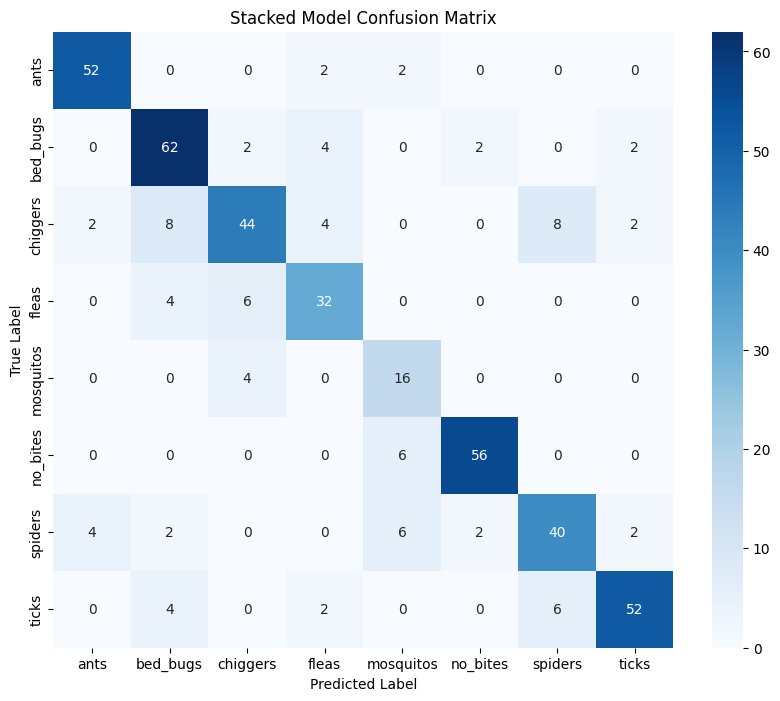

In [14]:
# =====================================================
# Confusion Matrix Heatmap
# =====================================================
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(testGenerator.classes, predictions)

plt.figure(figsize=(10,8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=CLASS_NAMES,
    yticklabels=CLASS_NAMES
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Stacked Model Confusion Matrix")
plt.show()

In [15]:
stacked_model.save("stacked_model_4_backbone_multigpu.keras")